#### This project was done as part of Data Mining course from the Master of Science in Data Science at SMU

<h4><b>Team Members:</b></h4><ul>  <li>Lisa Mendez</li>  <li>Brandon Lawrence</li>  <li>Dominique Edwards</li>  <li>Mariana Llamas-Cendon</li></ul>

Is weather an important factor to predict the number of fatalities involved in car accidents in each U.S. state in 2015? 

In this case, we are using 2015 data from FARS (Fatality Analysis Reporting System) that we have previously cleaned and prepared for analysis. The variable STATE is used as the user_id, then there will be only 50 users.

In [91]:
import graphlab as gl

#import data and create an SFrame
df_accident = gl.SFrame.read_csv('accident_good.csv')

#create an object for the model
model = gl.recommender.create(df_accident, user_id="STATE", item_id="WEATHER", target="FATALS")
results = model.recommend(users=None, k=5)
model.save("my_model")

Finished parsing file /Users/marianallamas-cendon/Documents/DM/Project/FINAL/accident_good.csv

Parsing completed. Parsed 100 lines in 0.10772 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/marianallamas-cendon/Documents/DM/Project/FINAL/accident_good.csv

Parsing completed. Parsed 28823 lines in 0.079148 secs.

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 28823 observations with 50 users and 9 items.

Data prepared in: 0.236465s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 28823 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 2.5               | Not Viable                               |

| 1       | 0.625             | Not Viable                               |

| 2       | 0.15625           | Not Viable                               |

| 3       | 0.0390625         | No Decrease (0.353963 >= 0.240391)       |

| 4       | 0.00976562        | 0.211903                                 |

| 5       | 0.00488281        | 0.222168                                 |

| 6       | 0.00244141        | 0.224155                                 |

| 7       | 0.0012207         | 0.228379                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.00976562        | 0.211903                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 120us        | 0.242647          | 0.351788              |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 305.141ms    | 0.123182          | 0.350219              | 0.00976562  |

| 2       | 573.336ms    | 0.117981          | 0.342759              | 0.00976562  |

| 3       | 826.033ms    | 0.117427          | 0.341952              | 0.00976562  |

| 4       | 1.11s        | 0.117737          | 0.342407              | 0.00976562  |

| 5       | 1.41s        | 0.117406          | 0.341926              | 0.00976562  |

| 6       | 1.72s        | 0.118027          | 0.342831              | 0.00976562  |

| 10      | 2.99s        | 0.118348          | 0.343309              | 0.00976562  |

| 11      | 3.30s        | 0.118708          | 0.343831              | 0.00976562  |

| 15      | 4.52s        | 0.119227          | 0.344587              | 0.00976562  |

| 20      | 6.08s        | 0.120449          | 0.346357              | 0.00976562  |

| 25      | 7.92s        | 0.121314          | 0.347605              | 0.00976562  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.224073

Final training RMSE: 0.346855

In [92]:
results

STATE,WEATHER,score,rank
1,3,1.12421589345,1
1,11,0.99717030069,2
1,12,0.972869839288,3
1,6,0.96137911617,4
2,3,1.12462417782,1
2,11,1.00257107569,2
2,6,0.96471393062,3
4,3,1.08113625087,1
4,11,1.00043321494,2
4,12,0.98865293502,3


In the above table, we can see three of the states showing: 1 (Alabama), 2 (Alaska) and 4 (Arizona). It is evident that from the nine levels of the attribute WEATHER conditions 3 (sleet, hail), 6 (Severe crosswinds), 11 (blowing snow), and 12 (freezing rain or drizzle) are the most preponderant. The three states shown display the highest scores when sleet or hail occur.

### Item-item recommendation

In [94]:
# from graphlab.recommender import item_similarity_recommender

item_item = gl.recommender.item_similarity_recommender.create(df_accident, 
                                  user_id="STATE", 
                                  item_id="WEATHER", 
                                  target="FATALS",
                                  only_top_k=3,
                                  similarity_type="cosine")

results = item_item.get_similar_items(k=3)
results.head()

Recsys training: model = item_similarity

Warning: Ignoring columns ﻿, VE_TOTAL, PVH_INVL, PEDS, PERNOTMVIT, PERMVIT, PERSONS, DAY_WEEK, ROUTE, MAN_COLL, RELJCT1, RELJCT2, WRK_ZONE, REL_ROAD, LGT_COND, DRUNK_DR, HARM_EV_RED, HR_RANGE;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 28823 observations with 50 users and 9 items.

Data prepared in: 0.07324s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 433us                          | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 914us                               | 1                | 0               |

| 1.907ms                             | 100              | 9               |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.007469s

WEATHER,similar,score,rank
1,2,0.986107587814,1
1,10,0.950036883354,2
1,5,0.921882271767,3
10,2,0.956637382507,1
10,1,0.950036883354,2
10,5,0.890565276146,3
2,1,0.986107587814,1
2,10,0.956637382507,2
2,5,0.924809992313,3
5,2,0.924809992313,1


In this case it is interesting that the item-item matrix is displaying weather 1 (clear) as similar to weather 2 (rain), weather 10 (cloudy), 5 (fog, smog, smoke). 

Next, we will divide the data into train (80%) and test (20%). And we will use root mean square as the measure. 

In [95]:
train, test = gl.recommender.util.random_split_by_user(df_accident,
                                                    user_id="STATE", item_id="WEATHER",
                                                    max_num_users=100, item_test_proportion=0.2)

Our data is densely populated, so using cosine is not the best option. But Graphlab only provides three metrics for similarity: Cosine, Jaccard and Pearson. So we decided to use Pearson because it measures the correlation in relation to what we are trying to predict. 

In [120]:
from IPython.display import display
from IPython.display import Image

gl.canvas.set_target('ipynb')


item_item = gl.recommender.item_similarity_recommender.create(train, 
                                  user_id="STATE", 
                                  item_id="WEATHER", 
                                  target="FATALS",
                                  only_top_k=5,
                                  similarity_type="pearson")

rmse_results = item_item.evaluate(test)


Recsys training: model = item_similarity

Warning: Ignoring columns ﻿, VE_TOTAL, PVH_INVL, PEDS, PERNOTMVIT, PERMVIT, PERSONS, DAY_WEEK, ROUTE, MAN_COLL, RELJCT1, RELJCT2, WRK_ZONE, REL_ROAD, LGT_COND, DRUNK_DR, HARM_EV_RED, HR_RANGE;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 23035 observations with 50 users and 9 items.

Data prepared in: 0.055159s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 944us                          | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 1.272ms                             | 1                | 0               |

| 1.737ms                             | 100              | 9               |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.006089s


Precision and recall summary statistics by cutoff
+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+------------------+
|   1    |       0.04      | 0.00021666757627 |
|   2    |       0.04      | 0.00080480111718 |
|   3    |       0.06      | 0.00524961579096 |
|   4    |      0.055      | 0.00585567639702 |
|   5    |      0.052      | 0.00585567639702 |
|   6    | 0.0513333333333 | 0.00585567639702 |
|   7    | 0.0513333333333 | 0.00585567639702 |
|   8    | 0.0513333333333 | 0.00585567639702 |
|   9    | 0.0513333333333 | 0.00585567639702 |
|   10   | 0.0513333333333 | 0.00585567639702 |
+--------+-----------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 0.35860930544969194)

Per User RMSE (best)
+-------+-------+-----------------+
| STATE | count |       rmse      |
+-------+-------+-----------------+
|   23  |   25  | 0.0799602579595 |
+-------+-------+-----------------+
[1 rows x 

In [97]:
print rmse_results.viewkeys()

dict_keys(['rmse_by_user', 'precision_recall_overall', 'rmse_by_item', 'precision_recall_by_user', 'rmse_overall'])


In [98]:
rmse_results['rmse_by_user']

STATE,count,rmse
49,49,0.398267012764
13,261,0.473255465995
36,210,0.509345362658
24,86,0.568055339284
2,13,0.479895226549
46,24,0.503237039163
30,32,0.508688817298
53,97,0.62243334726
42,225,0.539420918455
44,9,0.212129473686


States with lower counts have the lower rmse.

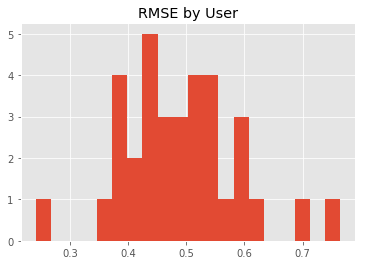

In [99]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

rmsevals = rmse_results['rmse_by_user']['rmse']
rmsevals = rmsevals[rmse_results['rmse_by_user']['count']>50]

plt.hist(rmsevals,bins=20)
plt.title('RMSE by User')
plt.show()

In [100]:

rmse_results['precision_recall_by_user']

STATE,cutoff,precision,recall,count
1,1,0.0,0.0,148
1,2,0.0,0.0,148
1,3,0.0,0.0,148
1,4,0.0,0.0,148
1,5,0.0,0.0,148
1,6,0.0,0.0,148
1,7,0.0,0.0,148
1,8,0.0,0.0,148
1,9,0.0,0.0,148
1,10,0.0,0.0,148


We suppose that our precision and recall are equal to 0.0 because even though there ara states that have higher counts, not all of them correspond to the same count regarding weather conditions.

In [101]:
import graphlab.aggregate as agg

# we will be using these aggregations
agg_list = [agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')]

# apply these functions to each group (we will group the results by 'k' which is the cutoff)
# the cutoff is the number of top items to look for see the following URL for the actual equation
# https://dato.com/products/create/docs/generated/graphlab.recommender.util.precision_recall_by_user.html#graphlab.recommender.util.precision_recall_by_user
rmse_results['precision_recall_by_user'].groupby('cutoff',agg_list)

# the groups are not sorted

cutoff,Avg of precision,Stdv of precision,Avg of recall,Stdv of recall
36,0.0513333333333,0.105769140637,0.00585567639702,0.0168259490442
2,0.06,0.162480768093,0.00428960968761,0.0160687640684
46,0.0513333333333,0.105769140637,0.00585567639702,0.0168259490442
31,0.0513333333333,0.105769140637,0.00585567639702,0.0168259490442
26,0.0513333333333,0.105769140637,0.00585567639702,0.0168259490442
8,0.0513333333333,0.105769140637,0.00585567639702,0.0168259490442
5,0.052,0.106595809799,0.00585567639702,0.0168259490442
16,0.0513333333333,0.105769140637,0.00585567639702,0.0168259490442
41,0.0513333333333,0.105769140637,0.00585567639702,0.0168259490442
4,0.055,0.111317863197,0.00585567639702,0.0168259490442


In [102]:
rec1 = gl.recommender.ranking_factorization_recommender.create(train, 
                                  user_id="STATE", 
                                  item_id="WEATHER", 
                                  target="FATALS")

rmse_results = rec1.evaluate(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 23035 observations with 50 users and 9 items.

Data prepared in: 0.410618s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 23035 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 2.5               | Not Viable                               |

| 1       | 0.625             | Not Viable                               |

| 2       | 0.15625           | Not Viable                               |

| 3       | 0.0390625         | No Decrease (0.926365 >= 0.241217)       |

| 4       | 0.00976562        | 0.221352                                 |

| 5       | 0.00488281        | 0.223879                                 |

| 6       | 0.00244141        | 0.224925                                 |

| 7       | 0.0012207         | 0.230568                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.00976562        | 0.221352                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 115us        | 0.240376          | 0.350149              |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 298.493ms    | 0.132287          | 0.36255               | 0.00976562  |

| 2       | 539.554ms    | 0.127225          | 0.355599              | 0.00976562  |

| 3       | 762.773ms    | 0.126311          | 0.35428               | 0.00976562  |

| 4       | 1.02s        | 0.125283          | 0.352865              | 0.00976562  |

| 5       | 1.24s        | 0.125665          | 0.353381              | 0.00976562  |

| 6       | 1.48s        | 0.125577          | 0.353264              | 0.00976562  |

| 10      | 2.50s        | 0.125752          | 0.353509              | 0.00976562  |

| 11      | 2.75s        | 0.126066          | 0.353948              | 0.00976562  |

| 15      | 3.80s        | 0.126564          | 0.354641              | 0.00976562  |

| 20      | 5.65s        | 0.126195          | 0.354153              | 0.00976562  |

| 25      | 8.34s        | 0.127464          | 0.355901              | 0.00976562  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.230913

Final training RMSE: 0.35475


Precision and recall summary statistics by cutoff
+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+------------------+
|   1    |       0.1       | 0.00386407777271 |
|   2    |       0.07      | 0.00509513837877 |
|   3    | 0.0533333333333 | 0.00552067029367 |
|   4    |       0.05      | 0.00565765659504 |
|   5    |      0.052      | 0.00585567639702 |
|   6    | 0.0513333333333 | 0.00585567639702 |
|   7    | 0.0513333333333 | 0.00585567639702 |
|   8    | 0.0513333333333 | 0.00585567639702 |
|   9    | 0.0513333333333 | 0.00585567639702 |
|   10   | 0.0513333333333 | 0.00585567639702 |
+--------+-----------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 0.36960424218234184)

Per User RMSE (best)
+-------+-------+----------------+
| STATE | count |      rmse      |
+-------+-------+----------------+
|   50  |   12  | 0.100419567997 |
+-------+-------+----------------+
[1 rows x 3 col

In [103]:
rmse_results['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')])

cutoff,Avg of precision,Stdv of precision,Avg of recall,Stdv of recall
36,0.0513333333333,0.105769140637,0.00585567639702,0.0168259490442
2,0.07,0.173493515729,0.00509513837877,0.0167179049896
46,0.0513333333333,0.105769140637,0.00585567639702,0.0168259490442
31,0.0513333333333,0.105769140637,0.00585567639702,0.0168259490442
26,0.0513333333333,0.105769140637,0.00585567639702,0.0168259490442
8,0.0513333333333,0.105769140637,0.00585567639702,0.0168259490442
5,0.052,0.106595809799,0.00585567639702,0.0168259490442
16,0.0513333333333,0.105769140637,0.00585567639702,0.0168259490442
41,0.0513333333333,0.105769140637,0.00585567639702,0.0168259490442
4,0.05,0.108012344973,0.00565765659504,0.016835433973


In [104]:
rec1 = gl.recommender.ranking_factorization_recommender.create(train, 
                                  user_id="STATE", 
                                  item_id="WEATHER", 
                                  target="FATALS",
                                  num_factors=8,                 # override the default value
                                  regularization=1e-02,           # override the default value
                                  linear_regularization = 1e-3)   # override the default value

rmse_results = rec1.evaluate(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 23035 observations with 50 users and 9 items.

Data prepared in: 0.283237s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 0.01     |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 0.001    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 23035 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.319362          | Not Viable                               |

| 1       | 0.0798405         | 0.185906                                 |

| 2       | 0.0399202         | 0.188271                                 |

| 3       | 0.0199601         | 0.194603                                 |

| 4       | 0.00998006        | 0.204291                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.0798405         | 0.185906                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 116us        | 0.240381          | 0.350151              |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 306.393ms    | 0.116716          | 0.339344              | 0.0798405   |

| 2       | 509.059ms    | 0.112391          | 0.334098              | 0.0798405   |

| 3       | 803.627ms    | 0.112158          | 0.333789              | 0.0798405   |

| 4       | 1.06s        | 0.111784          | 0.333227              | 0.0798405   |

| 5       | 1.32s        | 0.111703          | 0.333127              | 0.0798405   |

| 6       | 1.54s        | 0.111473          | 0.332766              | 0.0798405   |

| 10      | 2.39s        | 0.111373          | 0.332624              | 0.0798405   |

| 11      | 2.69s        | 0.11142           | 0.3327                | 0.0798405   |

| 15      | 3.35s        | 0.111305          | 0.332525              | 0.0798405   |

| 20      | 3.85s        | 0.111237          | 0.332418              | 0.0798405   |

| 25      | 4.41s        | 0.111223          | 0.332397              | 0.0798405   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.197643

Final training RMSE: 0.331709


Precision and recall summary statistics by cutoff
+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+------------------+
|   1    |       0.1       | 0.00386407777271 |
|   2    |       0.06      | 0.00428960968761 |
|   3    | 0.0533333333333 | 0.00505159598898 |
|   4    |      0.055      | 0.00585567639702 |
|   5    |      0.052      | 0.00585567639702 |
|   6    | 0.0513333333333 | 0.00585567639702 |
|   7    | 0.0513333333333 | 0.00585567639702 |
|   8    | 0.0513333333333 | 0.00585567639702 |
|   9    | 0.0513333333333 | 0.00585567639702 |
|   10   | 0.0513333333333 | 0.00585567639702 |
+--------+-----------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 0.340910366859333)

Per User RMSE (best)
+-------+-------+----------------+
| STATE | count |      rmse      |
+-------+-------+----------------+
|   23  |   25  | 0.132359226944 |
+-------+-------+----------------+
[1 rows x 3 colum

In [105]:

comparison = gl.recommender.util.compare_models(test, [item_item, rec1])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+------------------+
|   1    |       0.1       | 0.00387294302094 |
|   2    |       0.06      | 0.00428960968761 |
|   3    |       0.06      | 0.00524961579096 |
|   4    |      0.055      | 0.00585567639702 |
|   5    |      0.052      | 0.00585567639702 |
|   6    | 0.0513333333333 | 0.00585567639702 |
|   7    | 0.0513333333333 | 0.00585567639702 |
|   8    | 0.0513333333333 | 0.00585567639702 |
|   9    | 0.0513333333333 | 0.00585567639702 |
|   10   | 0.0513333333333 | 0.00585567639702 |
+--------+-----------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 0.49214565720619635)

Per User RMSE (best)
+-------+-------+----------------+
| STATE | count |      rmse      |
+-------+-------+----------------+
|   56  |   28  | 0.181364487913 |
+-------+-------+-----

In [106]:
comparisonstruct = gl.compare(test,[item_item, rec1])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+------------------+
|   1    |       0.1       | 0.00387294302094 |
|   2    |       0.06      | 0.00428960968761 |
|   3    |       0.06      | 0.00524961579096 |
|   4    |      0.055      | 0.00585567639702 |
|   5    |      0.052      | 0.00585567639702 |
|   6    | 0.0513333333333 | 0.00585567639702 |
|   7    | 0.0513333333333 | 0.00585567639702 |
|   8    | 0.0513333333333 | 0.00585567639702 |
|   9    | 0.0513333333333 | 0.00585567639702 |
|   10   | 0.0513333333333 | 0.00585567639702 |
+--------+-----------------+------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+------------------+
|  

In [107]:
gl.show_comparison(comparisonstruct,[item_item, rec1])

The recommendation seems to provide a lower rates for precision and recall than that of the item-item.

In [108]:
params = {'user_id': 'STATE', 
          'item_id': 'WEATHER', 
          'target': 'FATALS',
          'num_factors': [8, 12, 16, 24, 32], 
          'regularization':[0.001] ,
          'linear_regularization': [0.001]}

job = gl.model_parameter_search.create( (train,test),
        gl.recommender.ranking_factorization_recommender.create,
        params,
        max_models=5,
        environment=None)

# also note thatthis evaluator also supports sklearn
# https://dato.com/products/create/docs/generated/graphlab.toolkits.model_parameter_search.create.html?highlight=model_parameter_search

[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Aug-13-2017-20-21-5400000' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Aug-13-2017-20-21-5400000' scheduled.
[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: A job with name 'Model-Parameter-Search-Aug-13-2017-20-21-5400000' already exists. Renaming the job to 'Model-Parameter-Search-Aug-13-2017-20-21-5400000-656cc'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Aug-13-2017-20-21-5400000-656cc' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Aug-13-2017-20-21-5400000-656cc' scheduled.


In [109]:
job.get_status()

{'Canceled': 0, 'Completed': 0, 'Failed': 0, 'Pending': 5, 'Running': 0}

In [110]:
job_result = job.get_results()

job_result.head()

model_id,item_id,linear_regularization,max_iterations,num_factors,num_sampled_negative_examples ...,ranking_regularization
1,WEATHER,0.001,50,8,8,0.5
0,WEATHER,0.001,50,24,8,0.5
3,WEATHER,0.001,25,24,4,0.5
2,WEATHER,0.001,25,24,4,0.1
4,WEATHER,0.001,50,8,8,0.25
regularization,target,user_id,training_precision@5,training_recall@5,training_rmse,validation_precision@5
0.001,FATALS,STATE,0.888,0.0236984082479,0.337271256395,0.052
0.001,FATALS,STATE,0.916,0.02485691372,0.33140110575,0.052
0.001,FATALS,STATE,0.86,0.0220597204654,0.332521329278,0.052
0.001,FATALS,STATE,0.856,0.0219015334853,0.345050450602,0.052


In [111]:
bst_prms = job.get_best_params()
bst_prms

{'item_id': 'WEATHER',
 'linear_regularization': 0.001,
 'max_iterations': 50,
 'num_factors': 24,
 'num_sampled_negative_examples': 8,
 'ranking_regularization': 0.5,
 'regularization': 0.001,
 'target': 'FATALS',
 'user_id': 'STATE'}

In [112]:

models = job.get_models()
models

[Class                            : RankingFactorizationRecommender
 
 Schema
 ------
 User ID                          : STATE
 Item ID                          : WEATHER
 Target                           : FATALS
 Additional observation features  : 18
 User side features               : []
 Item side features               : []
 
 Statistics
 ----------
 Number of observations           : 23035
 Number of users                  : 50
 Number of items                  : 9
 
 Training summary
 ----------------
 Training time                    : 13.0606
 
 Model Parameters
 ----------------
 Model class                      : RankingFactorizationRecommender
 num_factors                      : 24
 binary_target                    : 0
 side_data_factorization          : 1
 solver                           : auto
 nmf                              : 0
 max_iterations                   : 50
 
 Regularization Settings
 -----------------------
 regularization                   : 0.001
 regular

Based on the training time, the second model seems to be the most efficient. As most of the other parameters do not change much between models. 